In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression

In [15]:
x = np.random.uniform(0, 40, 200)
x = np.sort(x)
y = -3*x + 20 + np.random.normal(0, 15, len(x))

In [16]:
def update_w_b(alpha, w, b, x, y):
    dx_dw = 0
    dx_db = 0
    for i in range(len(x)):
        dx_dw += -2*(y[i]-(w*x[i]+b))*x[i]
        dx_db += -2*(y[i]-(w*x[i]+b))
    w = w - alpha*(1/float(len(x)))*dx_dw
    b = b - alpha*(1/float(len(x)))*dx_db
    return w, b

In [17]:
def get_loss(x, y, w, b):
    loss = 0
    for i in range(len(x)):
        loss += (y[i] - (w*x[i]+b))**2
    return loss*float(1/len(x))

In [18]:
def new_train(x, y, alpha, lam):
    w = 0
    b = 0
    Q = get_loss(x,y,w,b)
    for e in range(400):
        el = random.randrange(0, len(x))
        epsilon = (y[el]-(w*x[el]+b))**2
        dw = -2*x[el]*(y[el]-(w*x[el]+b))
        db = -2*(y[el]-(w*x[el]+b))
        w = w - alpha*dw
        b = b - alpha*db
    return w, b

w, b = new_train(x, y, 0.00001, 0)
print(w, b)

-2.3004148625369 -0.05109016084977938


In [19]:
def predict(x, w, b):
    p = lambda x: w*x+b
    return np.array(list(map(p, x)))

In [20]:
yy = predict(x, w, b)
print(w, b)

-2.3004148625369 -0.05109016084977938


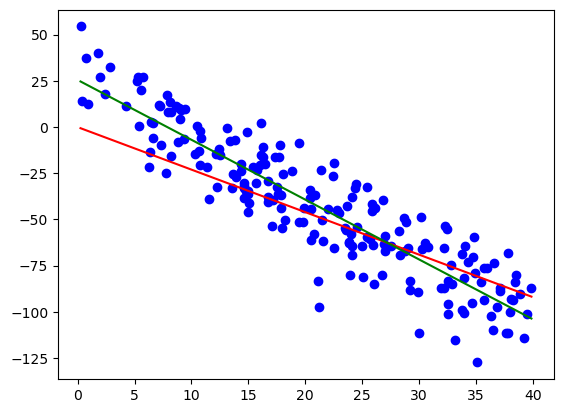

In [21]:
model = LinearRegression()
model.fit(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(x,y, 'bo')
plt.plot(x,yy, 'r-')
plt.plot(x, model.predict(x.reshape(-1, 1)), 'g-')
plt.show()
